In [1]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from keras.utils import np_utils
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
train=pd.read_csv('mnist_train.csv')

In [3]:
test=pd.read_csv('mnist_test.csv')

In [4]:
train.shape

(60000, 785)

In [5]:
test.shape

(10000, 785)

In [6]:
x_train=train.iloc[:,1:].values

In [7]:
x_train.shape

(60000, 784)

In [8]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
y_train=train['label']

In [10]:
y_train.shape

(60000,)

In [11]:
x_test=test.iloc[:,1:].values

In [12]:
x_test.shape

(10000, 784)

In [13]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
y_test=test['label']

In [15]:
Y_train=np_utils.to_categorical(y_train,10)

In [16]:
Y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
Y_test=np_utils.to_categorical(y_test,10)
Y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
#lets normalize the data i.e min max scaling
x_train=x_train/255
x_test=x_test/255

In [19]:
print(x_train[1])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [20]:
print(Y_train[2])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [21]:
#Some parameters
batch_size=128
output_dim=10
input_dim=x_train.shape[1]
nb_epoch=20

In [22]:
#Building a sequential model
model=tf.keras.Sequential()

In [23]:
#adding a layer
model.add(Dense(output_dim,input_dim=input_dim,activation='softmax'))

In [24]:
#compiling a model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
#running a model with parameters
history=model.fit(x_train,Y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1,validation_data=(x_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 243us/sample - loss: 1.2759 - accuracy: 0.6993 - val_loss: 0.8170 - val_accuracy: 0.8299
Epoch 2/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.7174 - accuracy: 0.8423 - val_loss: 0.6117 - val_accuracy: 0.8606
Epoch 3/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.5883 - accuracy: 0.8601 - val_loss: 0.5286 - val_accuracy: 0.8738
Epoch 4/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.5262 - accuracy: 0.8694 - val_loss: 0.4822 - val_accuracy: 0.8805
Epoch 5/20
60000/60000 [==============================] - ETA: 0s - loss: 0.4892 - accuracy: 0.87 - 1s 21us/sample - loss: 0.4884 - accuracy: 0.8750 - val_loss: 0.4514 - val_accuracy: 0.8857
Epoch 6/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.4623 - accuracy: 0.8799 - val_loss: 0.4297 - val_accuracy: 0.8888
Epoch 7/20
6

In [26]:
#Evaluating the model
score=model.evaluate(x_test,Y_test,verbose=0)

In [27]:
score

[0.3353300301194191, 0.9073]

In [28]:
print("test_score:",score[0])
print('test_accuarcy',score[1])

test_score: 0.3353300301194191
test_accuarcy 0.9073


In [29]:
#plotting the graph
import matplotlib.pyplot as plt

In [30]:
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

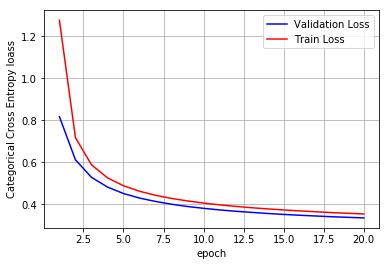

In [31]:
fig,ax=plt.subplots(1,1)
ax.set_xlabel("epoch"),ax.set_ylabel("Categorical Cross Entropy loass")
x=list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# MLP , Sigmoid and SGDoptimizer

In [32]:
model_sigmoid=Sequential()

In [33]:
model_sigmoid.add(Dense(512,activation="sigmoid",input_shape=(input_dim,)))#1st hidden layer
model_sigmoid.add(Dense(128,activation="sigmoid"))#2nd hidden layer
model_sigmoid.add(Dense(output_dim,activation='softmax'))

In [34]:
model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_sigmoid.compile(optimizer='sgd',loss="categorical_crossentropy",metrics=['accuracy'])
history1=model_sigmoid.fit(x_train,Y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1,validation_data=(x_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 71us/sample - loss: 2.2700 - accuracy: 0.2317 - val_loss: 2.2206 - val_accuracy: 0.3823
Epoch 2/20
60000/60000 [==============================] - 4s 70us/sample - loss: 2.1745 - accuracy: 0.4659 - val_loss: 2.1169 - val_accuracy: 0.5190
Epoch 3/20
60000/60000 [==============================] - 4s 70us/sample - loss: 2.0535 - accuracy: 0.5766 - val_loss: 1.9708 - val_accuracy: 0.6222
Epoch 4/20
60000/60000 [==============================] - 4s 71us/sample - loss: 1.8806 - accuracy: 0.6341 - val_loss: 1.7647 - val_accuracy: 0.6711
Epoch 5/20
60000/60000 [==============================] - 4s 67us/sample - loss: 1.6550 - accuracy: 0.6742 - val_loss: 1.5197 - val_accuracy: 0.6945
Epoch 6/20
60000/60000 [==============================] - 4s 67us/sample - loss: 1.4155 - accuracy: 0.7097 - val_loss: 1.2888 - val_accuracy: 0.7393
Epoch 7/20
60000/60000 [==============================] 

In [36]:
score1=model_sigmoid.evaluate(x_test,Y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [37]:
score1

[0.46798043653965, 0.8755]

In [38]:
print("test_score=",score1[0])
print('test_accuracy',score1[1])

test_score= 0.46798043653965
test_accuracy 0.8755


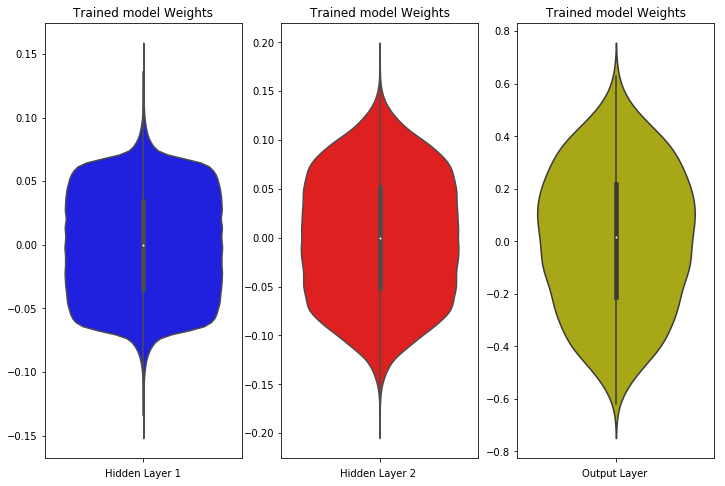

In [39]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP Sigmoid Adam Optimizer

In [40]:
model_sigmoid1=Sequential()
model_sigmoid1.add(Dense(512,input_shape=(input_dim,),activation='sigmoid'))
model_sigmoid1.add(Dense(128, activation='sigmoid'))
model_sigmoid1.add(Dense(output_dim,activation='softmax'))
model_sigmoid1.compile(optimizer='adam',metrics=['accuracy'],loss="categorical_crossentropy")
history=model_sigmoid1.fit(x_train,Y_train,verbose=1,epochs=nb_epoch,batch_size=batch_size,validation_data=(x_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.5252 - accuracy: 0.8636 - val_loss: 0.2526 - val_accuracy: 0.9266
Epoch 2/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2211 - accuracy: 0.9346 - val_loss: 0.1825 - val_accuracy: 0.9459
Epoch 3/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1631 - accuracy: 0.9514 - val_loss: 0.1481 - val_accuracy: 0.9554
Epoch 4/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1275 - accuracy: 0.9625 - val_loss: 0.1230 - val_accuracy: 0.9632
Epoch 5/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1011 - accuracy: 0.9702 - val_loss: 0.1018 - val_accuracy: 0.9682
Epoch 6/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0804 - accuracy: 0.9763 - val_loss: 0.0979 - val_accuracy: 0.9689
Epoch 7/20
60000/60000 [==============================] 

In [41]:
score2=model_sigmoid1.evaluate(x_test,Y_test)
print("test_score",score2[0])
print("test_accuracy",score2[1])

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test_score 0.07899387278452341
test_accuracy 0.9797


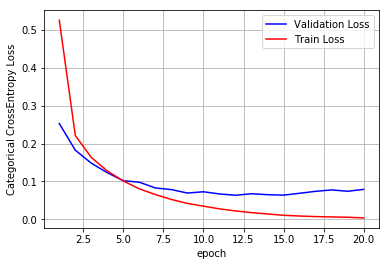

In [42]:
fig,ax=plt.subplots(1,1)
ax.set_xlabel("epoch");ax.set_ylabel("Categorical CrossEntropy Loss")
x=list(range(1,nb_epoch+1))
vy1=history.history['val_loss']
ty1=history.history["loss"]
plt_dynamic(x,vy1,ty1,ax)

Text(0.5, 0, 'output layer')

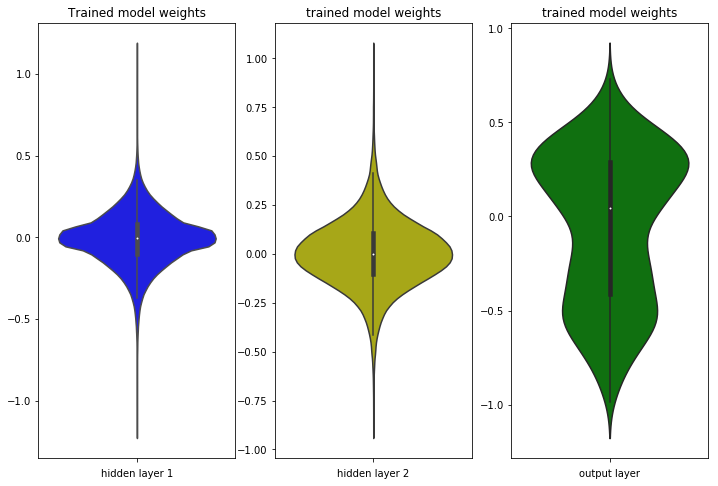

In [43]:
#Plotting violin plot of weights
w_after1=model_sigmoid1.get_weights()
h1_w1=w_after1[0].flatten().reshape(-1,1)
h2_w1=w_after1[2].flatten().reshape(-1,1)
out_w1=w_after1[4].flatten().reshape(-1,1)

fig=plt.figure(figsize=(12,8))
plt.title("Weight metrics after model train")
plt.subplot(1,3,1)
plt.title("Trained model weights")
ax=sns.violinplot(color="b",y=h1_w1)
plt.xlabel("hidden layer 1")

plt.subplot(1,3,2)
plt.title("trained model weights")
ax=sns.violinplot(color='y',y=h2_w1)
plt.xlabel("hidden layer 2")

plt.subplot(1,3,3)
plt.title("trained model weights")
ax=sns.violinplot(y=out_w1,color="g")
plt.xlabel("output layer")


# MLP RELU SGD

In [44]:
from tensorflow.keras.initializers import RandomNormal

In [45]:
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)
model_relu1=Sequential()
model_relu1.add(Dense(512,activation='relu',input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0,stddev=0.062,seed=None)))
model_relu1.add(Dense(128,activation="relu",kernel_initializer=RandomNormal(mean=0,stddev=0.125,seed=None)))
model_relu1.add(Dense(output_dim,activation="softmax"))

In [46]:
model_relu1.compile(optimizer='sgd',loss="categorical_crossentropy",metrics=['accuracy'])
history1=model_relu1.fit(x_train,Y_train,batch_size=batch_size,epochs=nb_epoch,validation_data=(x_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.7622 - accuracy: 0.7843 - val_loss: 0.3992 - val_accuracy: 0.8920
Epoch 2/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3622 - accuracy: 0.8989 - val_loss: 0.3106 - val_accuracy: 0.9156
Epoch 3/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3002 - accuracy: 0.9155 - val_loss: 0.2708 - val_accuracy: 0.9242
Epoch 4/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2662 - accuracy: 0.9253 - val_loss: 0.2473 - val_accuracy: 0.9319
Epoch 5/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2423 - accuracy: 0.9315 - val_loss: 0.2295 - val_accuracy: 0.9352
Epoch 6/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2234 - accuracy: 0.9369 - val_loss: 0.2149 - val_accuracy: 0.9383
Epoch 7/20
60000/60000 [==============================] 

KeyboardInterrupt: 

In [ ]:
score3=model_relu1.evaluate(x_test,Y_test)
print("test_score",score3[0])
print("test_accuracy",score[1])
fig,ax=plt.subplots(1,1)
ax.set_xlabel("epoch");ax.set_ylabel("Categorical CrossEntropy Loss")
x=list(range(1,nb_epoch+1))
vy2=history1.history['val_loss']
ty2=history1.history["loss"]
plt_dynamic(x,vy2,ty2,ax)

In [ ]:
w_after = model_relu1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP Relu Adam

In [ ]:
model_relu_adam=Sequential()
model_relu_adam.add(Dense(512,input_shape=(input_dim,),activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.062,seed=None)))
model_relu_adam.add(Dense(128,activation='relu',kernel_initializer=RandomNormal(mean=0,stddev=0.125,seed=None)))
model_relu_adam.add(Dense(output_dim,activation='softmax'))
model_relu_adam.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
predicted=model_relu_adam.fit(x_train,Y_train,batch_size=batch_size,verbose=1,epochs=nb_epoch,validation_data=(x_test,Y_test))

In [ ]:
score_adam=model_relu_adam.evaluate(x_test,Y_test)
print("model score",score_adam[0])
print("model accuracy",score_adam[1])

In [ ]:

fig,ax=plt.subplots(1,1)
ax.set_xlabel("epoch");ax.set_ylabel("Loss")
x=list(range(1,nb_epoch+1))
vy=predicted.history['val_loss']
ty=predicted.history['loss']
plt_dynamic(x,vy,ty,ax)

# MLP+BN+Adam

In [ ]:
from keras.layers.normalization import BatchNormalization

In [ ]:
model_batch=Sequential()
model_batch.add(Dense(512,activation='sigmoid',input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0,stddev=0.039,seed=None)))
model_batch.add(BatchNormalization())


model_batch.add(Dense(128,activation='sigmoid',kernel_initializer=RandomNormal(mean=0,stddev=0.055,seed=None)))
model_batch.add(BatchNormalization())


model_batch.add(Dense(output_dim,activation='softmax'))
model_batch.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
predi=model_batch.fit(x_train,Y_train,batch_size=batch_size,epochs=nb_epoch,validation_data=(x_test,Y_test),verbose=1)

